To do:
make more robust by checking whether the data aligns with what the columns say.
combine multiple spreadsheets and see how data aligns.
split main() into a "split(start, end, freq, target)" once everything works!
    split(earliestAgreed , latestAgreed , frequency , UPSdata)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Below is the original CSV converted to a Pandas dataframe, BUT with a new column appended! It is labeled \"datetime,\" and comes from appending the \"Date\" and \"Time\" columns, then converting to a datetime object.

In [21]:
UPSdata = pd.read_csv("UPS-1-1-2025 to 4-7-2025.csv")
UPSdata["datetime"] = pd.to_datetime(UPSdata['Date']+" "+UPSdata['Time']) 

UPSdata

,Date,Time,Watts Out (max),Watts Out (avg),Watts Out (actual),datetime
0,1/1/2025,0:20,149500,148228,147600,2025-01-01 00:20:00
1,1/1/2025,0:25,149900,148615,148600,2025-01-01 00:25:00
2,1/1/2025,0:30,149600,148662,148300,2025-01-01 00:30:00
3,1/1/2025,0:35,150100,148310,146500,2025-01-01 00:35:00
4,1/1/2025,0:40,148500,146951,147700,2025-01-01 00:40:00
...,...,...,...,...,...,...
27825,4/7/2025,15:05,151600,150525,150700,2025-04-07 15:05:00
27826,4/7/2025,15:10,152400,150392,150100,2025-04-07 15:10:00
27827,4/7/2025,15:15,151300,150003,149500,2025-04-07 15:15:00
27828,4/7/2025,15:20,151900,150888,151600,2025-04-07 15:20:00


Below is a resampling of the dataframe above that takes the average of \"Watts Out (avg)\" in 15 minute blocks based on the datetime column, as described in my 4/24/25 email. I did not check this for bugs.

In [20]:
UPSdata = pd.read_csv("UPS-1-1-2025 to 4-7-2025.csv")
UPSdata["datetime"] = pd.to_datetime(UPSdata['Date']+" "+UPSdata['Time']) 

UPSdata

Below is the original CSV converted to a Pandas dataframe, BUT with a new column appended! It is labeled "datetime," and comes from appending the "Date" and "Time" columns, then converting to a datetime object.


,Date,Time,Watts Out (max),Watts Out (avg),Watts Out (actual),datetime
0,1/1/2025,0:20,149500,148228,147600,2025-01-01 00:20:00
1,1/1/2025,0:25,149900,148615,148600,2025-01-01 00:25:00
2,1/1/2025,0:30,149600,148662,148300,2025-01-01 00:30:00
3,1/1/2025,0:35,150100,148310,146500,2025-01-01 00:35:00
4,1/1/2025,0:40,148500,146951,147700,2025-01-01 00:40:00
...,...,...,...,...,...,...
27825,4/7/2025,15:05,151600,150525,150700,2025-04-07 15:05:00
27826,4/7/2025,15:10,152400,150392,150100,2025-04-07 15:10:00
27827,4/7/2025,15:15,151300,150003,149500,2025-04-07 15:15:00
27828,4/7/2025,15:20,151900,150888,151600,2025-04-07 15:20:00


In [16]:
UPSblocks=UPSdata.resample('60min', on='datetime',closed = 'left')['Watts Out (avg)'].mean()

UPSblocks

Below is a resampling of the dataframe above that takes the average of "Watts Out (avg)" in 15 minute blocks based on the datetime column, as described in my 4/24/25 email. I did not check this for bugs.


datetime
2025-01-01 00:00:00    148024.000000
2025-01-01 01:00:00    147577.333333
2025-01-01 02:00:00    147532.666667
2025-01-01 03:00:00    147304.583333
2025-01-01 04:00:00    148109.916667
                           ...      
2025-04-07 11:00:00    150065.083333
2025-04-07 12:00:00    149158.000000
2025-04-07 13:00:00    148363.666667
2025-04-07 14:00:00    147921.833333
2025-04-07 15:00:00    150258.500000
Freq: 60min, Name: Watts Out (avg), Length: 2320, dtype: float64

Now I will try to plot the data using a quick and dirty matplotlib plot


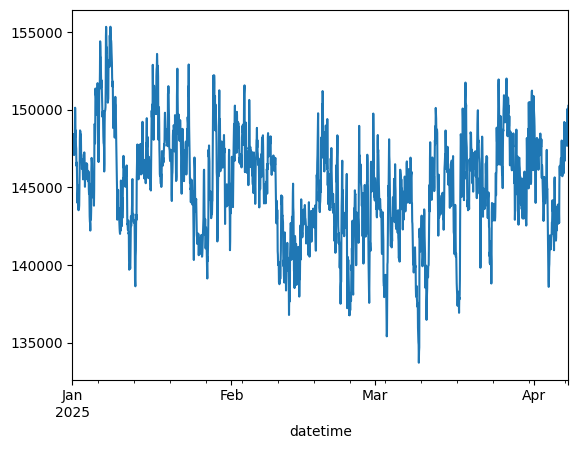

In [17]:
print("Now I will try to plot the data using a quick and dirty matplotlib plot")
UPSblocks.plot()
plt.show()